# 0. Import Dependencies

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torchvision import models
import numpy as np
import torchvision.transforms as T
from PIL import Image
import cv2

# 3. Semantic segmentation

Read paper Fully Convolutional Networks for Semantic Segmentation (https://people.eecs.berkeley.edu/~jonlong/long_shelhamer_fcn.pdf). From the class drive download script segmentation.py, containing example how to use pretrained models for semantic segmentation.

a) Briefly explain:
   
     i) How FCN upsamples predictions to match the original image size.
     ii) How had the authors improved the coarse predictions produced by the deepest layer.

In [2]:
def decode_segmap(image, nc=21):
    label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])
    r = np.zeros_like(image).astype(np.uint8)
    g = np.zeros_like(image).astype(np.uint8)
    b = np.zeros_like(image).astype(np.uint8)
    
    for l in range(0, nc):
        idx = image == l
        r[idx] = label_colors[l, 0]
        g[idx] = label_colors[l, 1]
        b[idx] = label_colors[l, 2]
        
    rgb = np.stack([r, g, b], axis=2)
    return rgb

In [3]:
def apply_mask(im, im_pred):
    """
    Overlays the predicted class labels onto an image using the alpha channel.
    This function assumes that the background label is the black color.
    This function is provided as an inspiration for the masking function you should write.
    """
    r_channel, g_channel, b_channel = cv2.split(im_pred)
    alpha_channel = 127 * np.ones(b_channel.shape, dtype=b_channel.dtype)
    # Make background pixels fully transparent
    alpha_channel -= 127 * np.all(im_pred == np.array([0, 0, 0]), axis=2).astype(b_channel.dtype)
    im_pred = cv2.merge((r_channel, g_channel, b_channel, alpha_channel))
    mask = Image.fromarray(im_pred, mode='RGBA')
    masked_img = Image.fromarray(im)
    masked_img.paste(mask, box=None, mask=mask)
    return np.array(masked_img)

In [4]:
# define the model
fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()

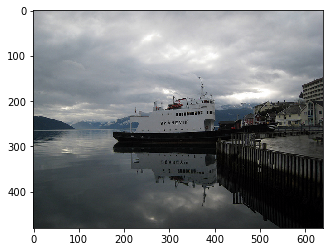

In [5]:
# load an image
img = Image.open('./boat.png')
plt.imshow(img); plt.show()

In [6]:
# transform the image
trf = T.Compose([T.ToTensor(), 
                 T.Normalize(mean = [0.485, 0.456, 0.406], 
                             std = [0.229, 0.224, 0.225])])
inp = trf(img).unsqueeze(0)

In [ ]:
# pass the input through the net
out = fcn(inp)['out']
print (out.shape)

In [1]:
# calculate labels
om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
print (np.unique(om))

NameError: name 'torch' is not defined

In [28]:
# show segmentation output
rgb = decode_segmap(om)
plt.imshow(rgb); plt.show()

NameError: name 'om' is not defined

b) Download YourEmail.png and take a class index assigned to you from classes.csv. Modify
segmentation.py so that you predict segmentation mask of this class (by FCN model) on the image given to you and highlight prediction via red mask blended with the original image. Submit this image as YourEmail_predicted.png. 

c) Decode the groundtruth image YourEmail_mask.png and calculate intersection over union (IOU) with the prediction for the class assigned to you. Report IOU in file YourEmail_iou.csv.